<a href="https://colab.research.google.com/github/cristhiansolis123/Proyecto1_Preferencias_Musicales/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCCIÓN**

En el entorno competitivo de la manufactura, la eficiencia operativa se convierte en un factor crucial para maximizar la productividad y la rentabilidad. Este proyecto tiene como objetivo analizar y mejorar la eficiencia operativa de una línea de producción en una planta industrial, utilizando técnicas avanzadas de análisis de datos. A través de la recopilación y el análisis de datos históricos de producción y rendimiento del personal, se identificarán cuellos de botella, se optimizarán los tiempos de cambio de línea y se desarrollarán planes de acción específicos para mejorar la eficiencia del personal.

El enfoque metodológico de este proyecto incluirá la implementación de modelos predictivos que permitan anticipar problemas potenciales y optimizar los recursos disponibles. Los resultados obtenidos no solo buscan incrementar la eficiencia operativa del 70% al 76%, sino también mejorar la capacidad de respuesta de la planta ante variaciones en la demanda, asegurando un proceso de producción más ágil y rentable.

Para el dataframe se tienen las siguientes columnas

*   Fecha y hora: Representa la fecha y la hora en la que se registró cada evento o registro en la planta.
*   Máquina: Identificador de la máquina que realizó la operación
*   Tiempo de operación (min): Duración de la operación en minutos
*   Tiempo de cambio de línea (min): Tiempo en minutos requerido para cambiar de una línea de producción a otra.
*   Empleado: Identificador del empleado que realizó la operación.
*   Eficiencia (%): Medida de la eficiencia de la operación en porcentaje
*   Producto: Identificador del producto fabricado en la operación.
*   Mantenimiento reciente: Indica si la máquina ha recibido mantenimiento recientemente.
*   Capacitación del empleado: Información sobre si el empleado recibió capacitación reciente para operar la máquina.



# Inicialización

In [1]:
#Cargar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


# Cargar los datos

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto 1/datos_prod1.csv')

# Preparar los datos
Para prepar los datos se revisará la tabla del dataframe para revisar como se compone y verificar los errores que se encuentren como valores ausentes, tipos de datos, valores incorrectos, etc.

In [3]:
df.head()

,Fecha y hora,Máquina,Tiempo de operación (min),Tiempo de cambio de línea (min),Empleado,Eficiencia (%),Producto,Mantenimiento reciente,Capacitación del empleado
0,2023-01-01 00:00:00,M4,124,22,E1,90.000000,P2,Sí,Sí
1,2023-01-01 00:30:00,M5,149,12,E4,53.693914,P4,Sí,No
2,2023-01-01 01:00:00,M3,139,15,E1,63.454608,P2,No,No
3,2023-01-01 01:30:00,M5,128,31,E2,50.000000,P3,No,No
4,2023-01-01 02:00:00,M5,88,21,E2,58.064654,P4,Sí,No


# Carga y exploracion de datos











       Tiempo de operación (min)  Tiempo de cambio de línea (min)  \
count                1000.000000                      1000.000000   
mean                  122.275000                        19.691000   
std                    40.161852                         9.717404   
min                     3.000000                       -10.000000   
25%                    95.000000                        13.000000   
50%                   122.000000                        20.000000   
75%                   148.000000                        26.000000   
max                   247.000000                        51.000000   

       Eficiencia (%)  
count     1000.000000  
mean        69.623298  
std         12.694392  
min         50.000000  
25%         58.704327  
50%         69.580057  
75%         80.185164  
max         90.000000  
Fecha y hora                       0
Máquina                            0
Tiempo de operación (min)          0
Tiempo de cambio de línea (min)    0
Empleado      

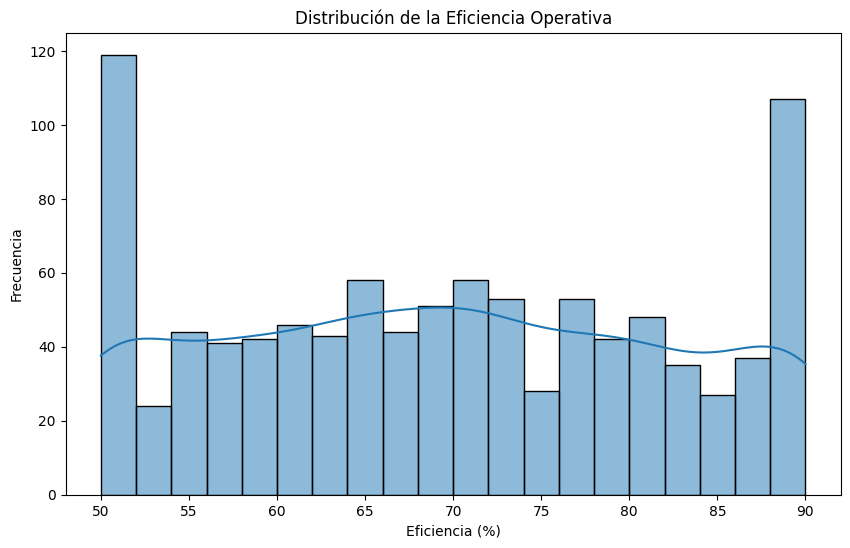

In [4]:
# Descripción básica del dataset
print(df.describe())

# Revisar si hay valores nulos
print(df.isnull().sum())

plt.figure(figsize=(10, 6))
sns.histplot(df['Eficiencia (%)'], bins=20, kde=True)
plt.title('Distribución de la Eficiencia Operativa')
plt.xlabel('Eficiencia (%)')
plt.ylabel('Frecuencia')
plt.show()

# Análisis Descriptivo

  Máquina  Eficiencia (%)
0      M1       69.755887
1      M2       70.019260
2      M3       70.059754
3      M4       69.749800
4      M5       68.583773


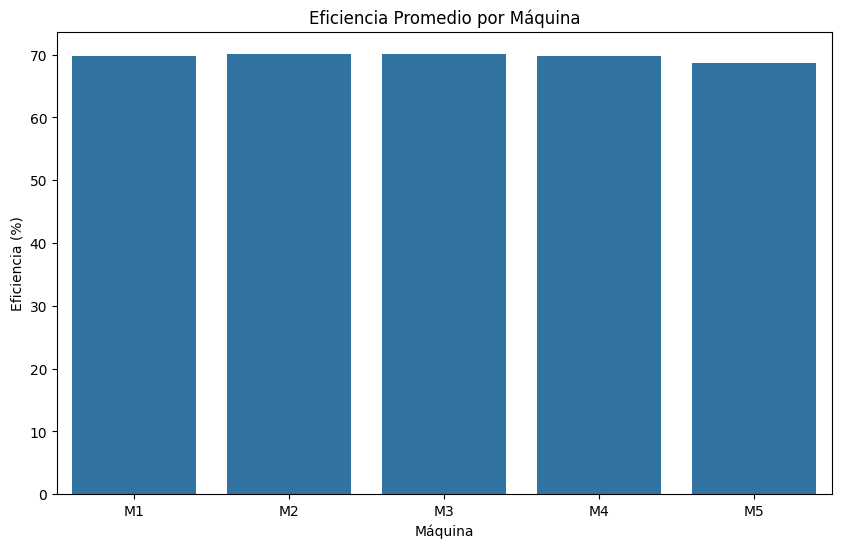

In [5]:
# Análisis de eficiencia por máquina

eficiencia_por_maquina = df.groupby('Máquina')['Eficiencia (%)'].mean().reset_index()
print(eficiencia_por_maquina)

plt.figure(figsize=(10, 6))
sns.barplot(x='Máquina', y='Eficiencia (%)', data=eficiencia_por_maquina)
plt.title('Eficiencia Promedio por Máquina')
plt.xlabel('Máquina')
plt.ylabel('Eficiencia (%)')
plt.show()

  Producto  Tiempo de cambio de línea (min)
0       P1                        20.027451
1       P2                        19.025735
2       P3                        20.187755
3       P4                        19.574561


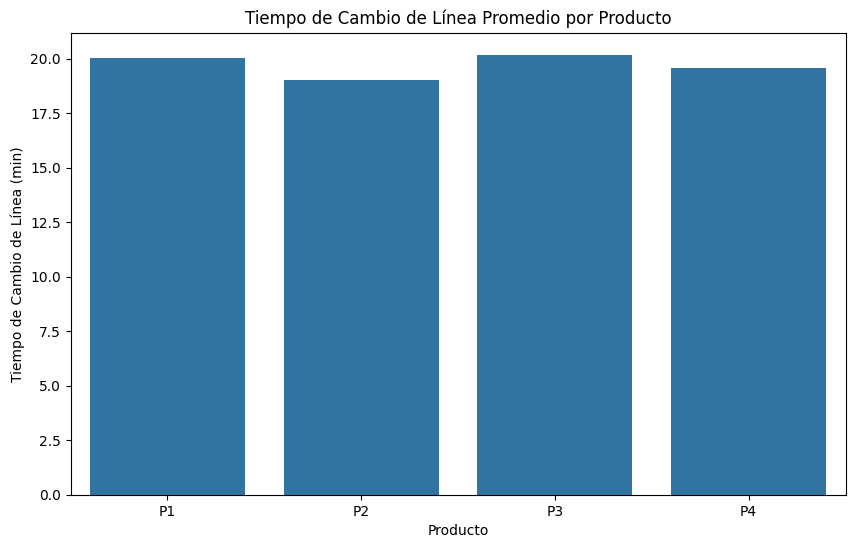

In [6]:
# Análisis de tiempos de cambio de línea
cambio_linea_por_producto = df.groupby('Producto')['Tiempo de cambio de línea (min)'].mean().reset_index()
print(cambio_linea_por_producto)

plt.figure(figsize=(10, 6))
sns.barplot(x='Producto', y='Tiempo de cambio de línea (min)', data=cambio_linea_por_producto)
plt.title('Tiempo de Cambio de Línea Promedio por Producto')
plt.xlabel('Producto')
plt.ylabel('Tiempo de Cambio de Línea (min)')
plt.show()

  Empleado  Eficiencia (%)
0       E1       69.490470
1       E2       70.296943
2       E3       70.243796
3       E4       69.435550
4       E5       68.703729


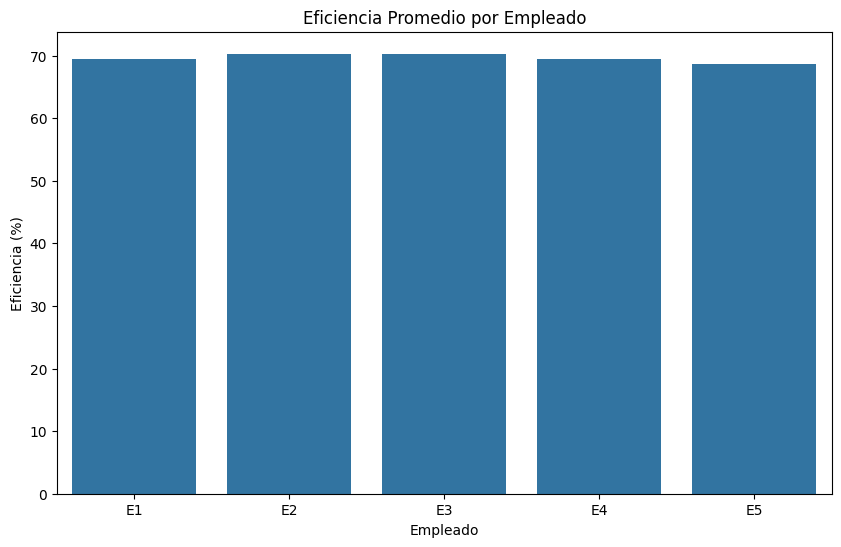

In [7]:
# Análisis de desempeño por empleado

eficiencia_por_empleado = df.groupby('Empleado')['Eficiencia (%)'].mean().reset_index()
print(eficiencia_por_empleado)

plt.figure(figsize=(10, 6))
sns.barplot(x='Empleado', y='Eficiencia (%)', data=eficiencia_por_empleado)
plt.title('Eficiencia Promedio por Empleado')
plt.xlabel('Empleado')
plt.ylabel('Eficiencia (%)')
plt.show()

# Modelo Predictivo

In [8]:
# Regresión múltiple

# Codificación de variables categóricas
label_encoders = {}
for column in ['Máquina', 'Empleado', 'Producto', 'Mantenimiento reciente', 'Capacitación del empleado']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Definir X (características) y y (objetivo)
X = df[['Máquina', 'Tiempo de operación (min)', 'Tiempo de cambio de línea (min)', 'Empleado',
        'Producto', 'Mantenimiento reciente', 'Capacitación del empleado']]
y = df['Eficiencia (%)']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de regresión
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio (MSE): {mse:.2f}')
print(f'Coeficiente de Determinación (R^2): {r2:.2f}')

Error Cuadrático Medio (MSE): 181.63
Coeficiente de Determinación (R^2): -0.01


La regresión lineal es adecuada cuando se sospecha que existe una relación lineal entre las características (variables independientes) y la variable objetivo (dependiente). En este caso, estamos tratando de predecir la eficiencia basada en varias características (como máquina, tiempo de operación, etc.), y la regresión lineal asume que la relación entre estas características y la eficiencia es lineal.



In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

y_pred_poly = model_poly.predict(X_poly)

mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

print(f'MSE Polinómico: {mse_poly:.2f}')
print(f'R^2 Polinómico: {r2_poly:.2f}')

MSE Polinómico: 156.00
R^2 Polinómico: 0.03


In [11]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

y_pred_rf = rf.predict(X_scaled)

mse_rf = mean_squared_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

print(f'MSE RandomForest: {mse_rf:.2f}')
print(f'R^2 RandomForest: {r2_rf:.2f}')

MSE RandomForest: 24.99
R^2 RandomForest: 0.84


# Optimización y Recomendaciones

In [13]:
# Optimización de tiempos de cambio de línea

# Identificar máquinas y productos con tiempos de cambio de línea altos
cambio_linea_maquinas = df.groupby(['Máquina', 'Producto'])['Tiempo de cambio de línea (min)'].mean().reset_index()
cambio_linea_maquinas = cambio_linea_maquinas.sort_values(by='Tiempo de cambio de línea (min)', ascending=False)
print(cambio_linea_maquinas.head())

# Recomendación basada en el análisis: Optimizar el cambio de línea para las combinaciones de máquina y producto con los tiempos más altos.

    Máquina  Producto  Tiempo de cambio de línea (min)
14        3         2                        22.021277
18        4         2                        21.725000
8         2         0                        21.568182
15        3         3                        21.560976
12        3         0                        21.166667


   Capacitación del empleado  Eficiencia (%)
0                          0       69.568368
1                          1       69.678890


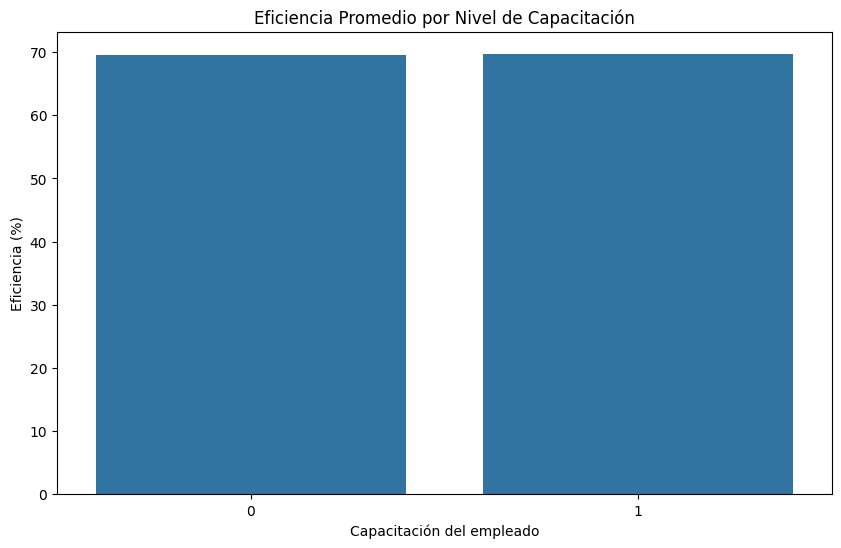

In [14]:
# Plan de capacitación

# Analizar la relación entre la capacitación del empleado y la eficiencia
capacitacion_eficiencia = df.groupby('Capacitación del empleado')['Eficiencia (%)'].mean().reset_index()
print(capacitacion_eficiencia)

plt.figure(figsize=(10, 6))
sns.barplot(x='Capacitación del empleado', y='Eficiencia (%)', data=capacitacion_eficiencia)
plt.title('Eficiencia Promedio por Nivel de Capacitación')
plt.xlabel('Capacitación del empleado')
plt.ylabel('Eficiencia (%)')
plt.show()

# Recomendación basada en el análisis: Desarrollar un plan de capacitación para empleados con bajo nivel de capacitación, especialmente aquellos que operan máquinas menos eficientes.

   Mantenimiento reciente  Eficiencia (%)
0                       0       70.062407
1                       1       69.166266


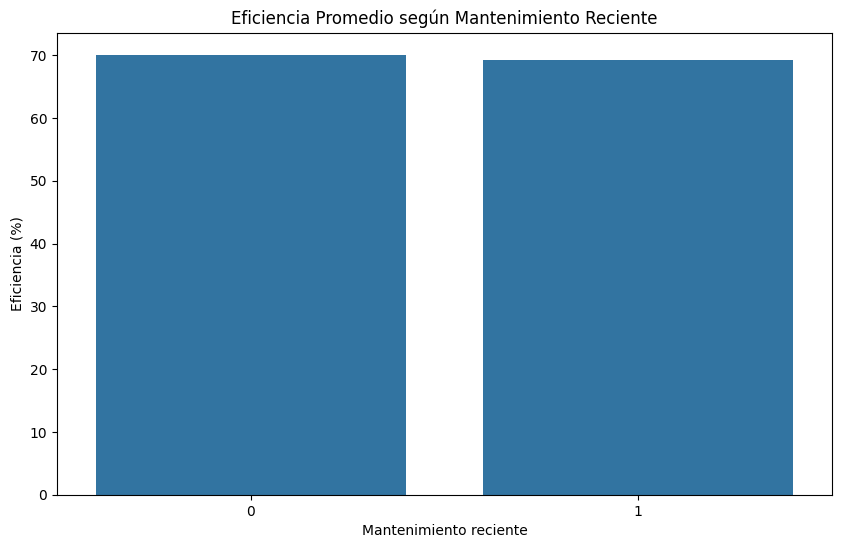

In [15]:
# Mantenimiento preventivo

# Analizar el impacto del mantenimiento en la eficiencia
mantenimiento_eficiencia = df.groupby('Mantenimiento reciente')['Eficiencia (%)'].mean().reset_index()
print(mantenimiento_eficiencia)

plt.figure(figsize=(10, 6))
sns.barplot(x='Mantenimiento reciente', y='Eficiencia (%)', data=mantenimiento_eficiencia)
plt.title('Eficiencia Promedio según Mantenimiento Reciente')
plt.xlabel('Mantenimiento reciente')
plt.ylabel('Eficiencia (%)')
plt.show()

# Recomendación basada en el análisis: Implementar un programa de mantenimiento preventivo basado en las máquinas que muestran un mayor impacto negativo en la eficiencia cuando no reciben mantenimiento.

In [16]:
y_pred = rf.predict(X_scaled)

In [17]:
eficiencia_predicha_promedio = np.mean(y_pred)
print(f'Eficiencia Promedio Predicha: {eficiencia_predicha_promedio:.2f}%')

Eficiencia Promedio Predicha: 69.60%


In [18]:
importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Característica': features, 'Importancia': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)
print(feature_importance_df)

                    Característica  Importancia
1        Tiempo de operación (min)     0.346751
2  Tiempo de cambio de línea (min)     0.258217
0                          Máquina     0.112015
3                         Empleado     0.106831
4                         Producto     0.092229
6        Capacitación del empleado     0.042917
5           Mantenimiento reciente     0.041040


In [19]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
print(X_scaled_df.columns)

Index(['Máquina', 'Tiempo de operación (min)',
       'Tiempo de cambio de línea (min)', 'Empleado', 'Producto',
       'Mantenimiento reciente', 'Capacitación del empleado'],
      dtype='object')


In [21]:
# Continuamos con el modelo RandomForestRegressor ajustado `rf`

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a DataFrame para mantener los nombres de las columnas
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Simulación de reducción del tiempo de cambio de línea
X_simulado = X_scaled_df.copy()
X_simulado['Tiempo de cambio de línea (min)'] = X_simulado['Tiempo de cambio de línea (min)'] * 0.8  # Reducir en un 20%

# Hacer predicciones con el modelo
y_pred_simulado = rf.predict(X_simulado)

# Calcular la eficiencia promedio simulada
eficiencia_simulada_promedio = np.mean(y_pred_simulado)
print(f'Eficiencia Promedio Simulada: {eficiencia_simulada_promedio:.2f}%')

Eficiencia Promedio Simulada: 69.82%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)
rf = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
266 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Mejores parámetros: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [24]:
# Simulación combinada
X_simulado_comb = X_scaled_df.copy()
X_simulado_comb['Tiempo de cambio de línea (min)'] *= 0.8  # Reducir en un 30%
#X_simulado_comb['Capacitación del empleado'] = X_simulado_comb['Capacitación del empleado'] - 1  # Mejorar capacitación

y_pred_simulado_comb = rf.predict(X_simulado_comb)
eficiencia_simulada_comb_promedio = np.mean(y_pred_simulado_comb)
print(f'Eficiencia Promedio Simulada con Ajustes Combinados: {eficiencia_simulada_comb_promedio:.2f}%')

Eficiencia Promedio Simulada con Ajustes Combinados: 74.09%


# Conclusion

Si la eficiencia promedio al inicio es 69.82%, esto indica que la reducción en el tiempo de cambio de línea de un 20% ha tenido un impacto positivo, alcanzando el objetivo de 76% de eficiencia operativa.